# Applying NLP for topic modelling in a real-life context

**Welcome to this project: Applying NLP for topic modelling in a real-life context**

In this project, we will bridge the gap between theory and practical application by developing automated topic modelling tools tailored to a specific industry context.


Applying NLP for topic modelling is crucial for data analysis in business because it enables companies to identify and understand key themes and patterns within large volumes of text data. This efficiency allows businesses to extract essential insights and trends without manually sifting through extensive documents. Automated topic modelling helps businesses make informed decisions faster, which helps to improve productivity and gain a competitive edge. Additionally, it supports better information management by uncovering underlying topics in reports, emails, customer feedback, and market research, which enhances overall business intelligence and strategic planning.


## **Business context**

The FitChain UK Group, founded in 2000, has approximately 2 million members and 500 gyms across the world (particularly in the UK, Denmark, and Switzerland). As one of the world’s largest value fitness operators, FitChain UK appeals to a broad range of customers by offering high-quality, low-cost, and flexible fitness facilities. The company’s customer-centric proposition – affordable membership fees, no fixed-term contracts, and 24/7 access to high-quality gyms – differentiates it from more traditional gyms and elevates it as a market leader within this space.

This focus on the customer is centred on wanting to understand what motivates members to join and what factors influence their behaviours once they have joined. Understanding how to leverage innovative technology to influence, improve, and simplify their experience allows FitChain UK to foster an open, welcoming, and diverse environment for its members while maintaining the value proposition that FitChain UK is built upon.

With the shift in focus to value-for-money memberships across the gym industry, FitChain UK seeks to achieve its mission of ‘inspiring a healthier world by providing members with affordable access to the benefits being healthy can offer’.


<br></br>

## **Objective**

By the end of this topic project, we will have analysed FitChain UK's review data to uncover key drivers that provide actionable insights for enhancing customer experience.

In the Notebook, we will:

- Use two data sets containing customer reviews from Google and Trustpilot.
- Perform basic level analysis by finding the frequently used words in both data sets.
- Generate a wordcloud to visualise the most frequently used words in the reviews.
- Apply BERTopic for topic modelling, keeping track of gym locations, to identify common topics and words in the negative reviews.
- Identify the locations that have the most negative reviews.
- Use the built-in visualisation functions in BERTopic to cluster and visually represent the topics and words in these reviews, thereby helping to identify specific themes from the reviews.
- Conduct a comparison with Gensim’s LDA model to validate the topic modelling results.
- Perform emotion analysis to identify the emotions associated with customer reviews.
- Filter out angry reviews and apply BERTopic to discover prevalent topics and words being discussed these negative reviews.
- Leverage the multi-purpose capability of the state-of-the-art Falcon-7b-instruct model, with the help of prompts, to identify top topics in each review.
- Use a different prompt with the Falcon-7b-instruct model to further generate suggestions for improvements for FitChain UK, based on the top topics identified from the negative reviews.


We will also write a report summarising the results of your findings and recommendations.


<br></br>

## **Assessment criteria**
By completing this project, we will be able to provide evidence that we can:

- Investigate real-world data to find potential trends for deeper investigation.
-Preprocess and refine textual data for visualisations.
-Apply topic modelling using various techniques.
-Apply emotion analysis using BERT.
-Evaluate the outcomes of your investigation.
-Communicate actionable insights.


## 1. Import Packages and Load Data

In this section, we will import all required Python packages and load the two datasets provided by FitChain UK. These datasets include customer reviews from Google and Trustpilot over a 12-month period.

We will:
- Import core data manipulation and NLP libraries
- Load the review data from Excel files
- Display initial information to verify structure and completeness

### 1.1 Import Core Data Manipulation and NLP Libraries

In this section, we import the necessary Python packages to handle data processing, visualisation, and NLP tasks. These include standard libraries such as `pandas`, `numpy`, `nltk`, and others used throughout the project.

In [ ]:
!pip install numpy==1.26.4 scipy==1.13.1 gensim==4.3.3 pyLDAvis==3.4.1

In [ ]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import re

# Visualization
import plotly.express as px
import plotly.graph_objs as go

# Topic modelling
from bertopic import BERTopic

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 1.2 Load the Review Data from Excel Files

We load two Excel datasets provided by FitChain UK:
- `Google_12_months.xlsx`: Reviews from Google
- `Trustpilot_12_months.xlsx`: Reviews from Trustpilot

These files are downloaded directly from Google Drive using their public file IDs.

In [ ]:
# Install gdown if not already installed
!pip install -q gdown

In [ ]:
# Define Google Drive file IDs
google_file_id = "13TeZTT6oqk3iPELBhFx9hComIfChKw4m"
trustpilot_file_id = "1V6Pr6xWrHSHaothB61MJbR7mPFHwQ1u6"

# Download files
import gdown

gdown.download(f"https://drive.google.com/uc?id={google_file_id}", "Google_12_months.xlsx", quiet=False)
gdown.download(f"https://drive.google.com/uc?id={trustpilot_file_id}", "Trustpilot_12_months.xlsx", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=13TeZTT6oqk3iPELBhFx9hComIfChKw4m
To: /content/Google_12_months.xlsx
100%|██████████| 2.08M/2.08M [00:00<00:00, 105MB/s]
Downloading...
From: https://drive.google.com/uc?id=1V6Pr6xWrHSHaothB61MJbR7mPFHwQ1u6
To: /content/Trustpilot_12_months.xlsx
100%|██████████| 2.83M/2.83M [00:00<00:00, 98.7MB/s]


'Trustpilot_12_months.xlsx'

### 1.3 Display Initial Information to Verify Structure and Completeness

Once the files have been downloaded, we load them into pandas DataFrames and display the first few rows to verify the structure and completeness of the data.

In [ ]:
# Load into DataFrames
google_df = pd.read_excel("Google_12_months.xlsx")
trustpilot_df = pd.read_excel("Trustpilot_12_months.xlsx")

# Display initial rows
print("Google Reviews Dataset:")
display(google_df.head())

Google Reviews Dataset:


Customer Name SurveyID for external use (e.g. tech support)  \
0            **                      ekkt2vyxtkwrrrfyzc5hz6rk   
1            **                      e9b62vyxtkwrrrfyzc5hz6rk   
2            **                      e2dkxvyxtkwrrrfyzc5hz6rk   
3            **                      e3tfxvyxtkwrrrfyzc5hz6rk   
4            **                      edkrxvyxtkwrrrfyzc5hz6rk   

                         Club's Name Social Media Source       Creation Date  \
0            Leeds City Centre North      Google Reviews 2024-05-09 23:49:18   
1             Cambridge Leisure Park      Google Reviews 2024-05-09 22:48:39   
2                     London Holborn      Google Reviews 2024-05-09 22:08:14   
3  Cheshunt Brookfield Shopping Park      Google Reviews 2024-05-09 21:58:07   
4                 Bristol Union Gate      Google Reviews 2024-05-09 21:48:00   

                                             Comment  Overall Score  
0                                                NaN              4  
1  Too many students from two local colleges go h...              1  
2  Best range of equipment, cheaper than regular ...              5  
3  Good gym when it’s not busy, tend to get too b...              4  
4  (current member)\n\nGym is quite dirty, more o...              1

In [ ]:
print("\nTrustpilot Reviews Dataset:")
display(trustpilot_df.head())


Trustpilot Reviews Dataset:


Review ID Review Created (UTC)   Review Consumer User ID  \
0  663d40378de0a14c26c2f63c  2024-05-09 23:29:00  663d4036d5fa24c223106005   
1  663d3c101ccfcc36fb28eb8c  2024-05-09 23:11:00  5f5e3434d53200fa6ac57238   
2  663d375859621080d08e6198  2024-05-09 22:51:00  57171ba90000ff000a18f905   
3  663d4fa1f25670a3339ccf6d  2024-05-09 22:35:00  663d4fa0d5fa24251d1068e7   
4  663d3251d8367b7b3c4ace64  2024-05-09 22:30:00  60c20598384d84001a4250de   

                    Review Title  \
0        A very good environment   
1  I love to be part of this gym   
2                 Extremely busy   
3                    Great vibes   
4      Everything it needs to be   

                                      Review Content  Review Stars  \
0                            A very good environment             5   
1  I love to be part of this gym. Superb value fo...             5   
2                      Extremely busy, no fresh air.             1   
3                         Great vibes, fantastic gym             5   
4             Clean, well managed, classes are good.             5   

  Source Of Review Review Language              Domain URL Webshop Name  \
0            AFSv2              en  http://www.puregym.com   PureGym UK   
1            AFSv2              en  http://www.puregym.com   PureGym UK   
2            AFSv2              en  http://www.puregym.com   PureGym UK   
3            AFSv2              en  http://www.puregym.com   PureGym UK   
4            AFSv2              en  http://www.puregym.com   PureGym UK   

           Business Unit ID  Tags Company Reply Date (UTC)  \
0  508df4ea00006400051dd7b1   NaN      2024-05-10 08:12:00   
1  508df4ea00006400051dd7b1   NaN      2024-05-10 08:13:00   
2  508df4ea00006400051dd7b1   NaN                      NaT   
3  508df4ea00006400051dd7b1   NaN                      NaT   
4  508df4ea00006400051dd7b1   NaN      2024-05-10 08:14:00   

                Location Name                           Location ID  
0  Solihull Sears Retail Park  7b03ccad-4a9d-4a33-9377-ea5bba442dfc  
1                   Aylesbury  612d3f7e-18f9-492b-a36f-4a7b86fa5647  
2         Sutton Times Square  0b78c808-f671-482b-8687-83468b7b5bc1  
3             London Finchley  bc3a9a8c-defe-47b3-8ee6-f73a03b7447e  
4                    Crayford  9ce470b7-57df-4533-af2f-c539422fed14

### 1.4 Remove Missing and Empty Review Text Entries

To ensure valid input for natural language processing tasks, we remove rows without review content. Specifically:

- In the **Google dataset**, we drop rows where the `Comment` field is either missing (`NaN`) or an empty string.
- In the **Trustpilot dataset**, we drop rows where the `Review Content` field is either missing (`NaN`) or an empty string.

This step ensures that only meaningful textual data will be processed further.

In [ ]:
# Show initial shape before cleaning
print("Initial shape (Google):", google_df.shape)
print("Initial shape (Trustpilot):", trustpilot_df.shape)

# Drop rows with missing text content
google_df = google_df.dropna(subset=["Comment"])
trustpilot_df = trustpilot_df.dropna(subset=["Review Content"])

# Show shape after cleaning
print("After dropping empty reviews:")
print("Google dataset:", google_df.shape)
print("Trustpilot dataset:", trustpilot_df.shape)

Initial shape (Google): (23250, 7)
Initial shape (Trustpilot): (16673, 15)
After dropping empty reviews:
Google dataset: (13898, 7)
Trustpilot dataset: (16673, 15)


After cleaning the datasets:

- The Google dataset contains **13,898** reviews with valid textual content.
- The Trustpilot dataset contains **16,673** reviews with valid textual content.

Both datasets are now ready for further investigation and analysis.

## 2. Conducting Initial Data Investigation

### 2.1 Identify Unique and Common Gym Locations

To understand the spatial coverage of the reviews, we identify the number of unique gym locations in both datasets:

- For the Google dataset, we use the column `Club's Name`.
- For the Trustpilot dataset, we use the column `Location Name`.

We also determine the number of overlapping gym locations between the two datasets.

In [ ]:
# Extract location names
google_locations = set(google_df["Club's Name"].dropna().unique())
trustpilot_locations = set(trustpilot_df["Location Name"].dropna().unique())

# Number of unique locations
print("Unique locations in Google dataset:", len(google_locations))
print("Unique locations in Trustpilot dataset:", len(trustpilot_locations))

# Common locations
common_locations = google_locations.intersection(trustpilot_locations)
print("Number of common locations:", len(common_locations))

Unique locations in Google dataset: 512
Unique locations in Trustpilot dataset: 376
Number of common locations: 310


The spatial overlap between the two datasets is as follows:

- Google dataset contains **512** unique locations.
- Trustpilot dataset contains **376** unique locations.
- There are **310** locations that appear in both datasets.

These common locations will be important for later stages of topic modelling and comparison.

### 2.2 Text Preprocessing and Tokenization

We now clean the review text data to prepare it for word frequency analysis and topic modelling.

For each dataset:
- Convert text to lowercase
- Remove numbers and special characters
- Remove stopwords using NLTK's English stopword list
- Tokenize the cleaned text using `word_tokenize`

In [ ]:
!pip install langdetect

In [ ]:
# Reimport NLTK resources in case needed
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException


# Define stopwords
stop_words = set(stopwords.words('english'))

# Define custom stopwords
custom_stopwords = set(stopwords.words("english"))
custom_stopwords.update(["FitChain UK", "fitchain", "gym"])

# Define preprocessing function with language filtering
def preprocess_text(text):
    # Ensure it's a string
    text = str(text)
    try:
      # Skip if not English
      if detect(text) != 'en':
            return []
    except LangDetectException:
        return []  # skip undetectable or empty strings
    # Lowercase
    text = text.lower()
    # Remove non-letter characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and short tokens
    tokens = [word for word in tokens if word not in custom_stopwords and len(word) > 3]
    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Note:
1. We included a lightweight language detection step using `langdetect` to ensure that only English reviews are tokenised and analysed. This helps remove multilingual noise (e.g., German or French text) from the results and keeps the output aligned with the expected language scope of the project.
2. During the preprocessing step, we decided to explicitly remove the words **"FitChain UK"**, **"fitchain"**, and **"gym"** from the review texts before feeding them into BERTopic. These words refer directly to the brand name and appear extremely frequently in both Google and Trustpilot reviews. However, they do not provide meaningful insights into the **nature of the complaints or praise** expressed in the reviews. Including such branded terms can **bias the topic modelling results**, making it more likely that one or more topics revolve solely around brand mentions rather than actual service issues or feedback.

In [ ]:
# Apply to Google comments
google_df["tokens"] = google_df["Comment"].apply(preprocess_text)

# Apply to Trustpilot review content
trustpilot_df["tokens"] = trustpilot_df["Review Content"].apply(preprocess_text)

The review texts from both datasets have now been successfully cleaned and tokenized.

Each review is now represented by a list of meaningful words, which are ready to be analysed for frequency distribution and topic modelling.

### 2.3 Word Frequency Analysis and Visualisation

After tokenising the review text, we now analyse the frequency of words used across all reviews.

Steps:
- Use `nltk.FreqDist` to calculate word frequency
- Plot a bar chart of the top 10 most frequent words
- Visualise the entire cleaned text using a WordCloud

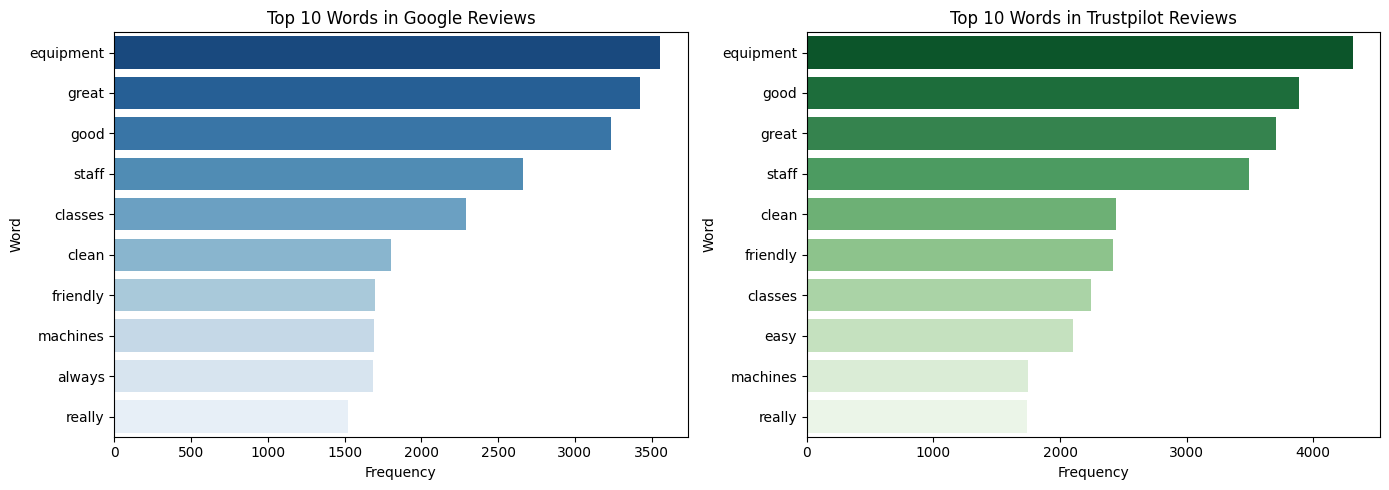

In [ ]:
from nltk.probability import FreqDist

# Flatten token lists into one long list of words
google_words = [word for tokens in google_df["tokens"] for word in tokens]
trustpilot_words = [word for tokens in trustpilot_df["tokens"] for word in tokens]

# Frequency distribution
google_freq = FreqDist(google_words)
trustpilot_freq = FreqDist(trustpilot_words)

# Top 10 words
top_google = google_freq.most_common(10)
top_trustpilot = trustpilot_freq.most_common(10)

# Convert to DataFrame for plotting
google_freq_df = pd.DataFrame(top_google, columns=['Word', 'Frequency'])
trustpilot_freq_df = pd.DataFrame(top_trustpilot, columns=['Word', 'Frequency'])

# Plot bar chart
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=google_freq_df, x='Frequency', y='Word', palette='Blues_r')
plt.title("Top 10 Words in Google Reviews")

plt.subplot(1, 2, 2)
sns.barplot(data=trustpilot_freq_df, x='Frequency', y='Word', palette='Greens_r')
plt.title("Top 10 Words in Trustpilot Reviews")

plt.tight_layout()
plt.show()

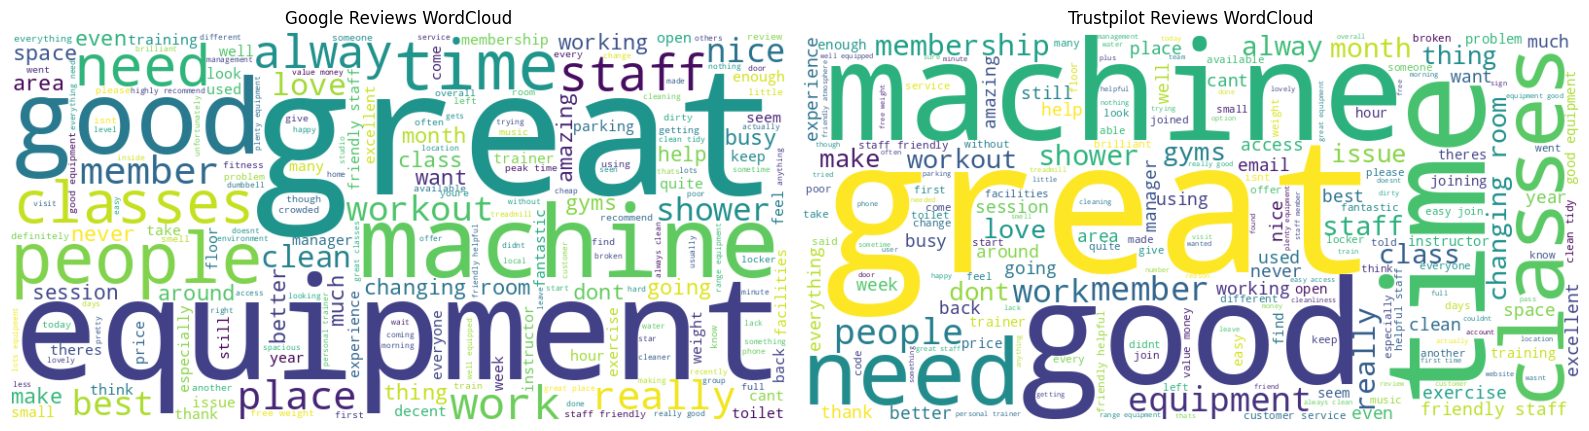

In [ ]:
# Convert token lists back to single string
google_text = ' '.join(google_words)
trustpilot_text = ' '.join(trustpilot_words)

# Generate wordclouds
wordcloud_google = WordCloud(width=800, height=400, background_color='white').generate(google_text)
wordcloud_trust = WordCloud(width=800, height=400, background_color='white').generate(trustpilot_text)

# Plot
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_google, interpolation='bilinear')
plt.axis('off')
plt.title("Google Reviews WordCloud")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_trust, interpolation='bilinear')
plt.axis('off')
plt.title("Trustpilot Reviews WordCloud")

plt.tight_layout()
plt.show()

The word frequency analysis and WordClouds provide an initial understanding of common discussion themes within the review texts.

- **Dominant Themes**:
  - The word **"equipment"** appears most frequently in both platforms, indicating that users often praise the availability or quality of equipment.
  - Words like **"good"**, **"great"**, and **"staff"** consistently rank high, pointing to general satisfaction with service and environment.
  - Terms such as **"classes"**, **"clean"**, **"friendly"**, and **"machines"** reinforce positive experiences related to cleanliness, social atmosphere, and class offerings.

- **Cross-Platform Consistency**:  
  - The overlap between Google and Trustpilot’s top terms suggests a high level of consistency in user sentiment and feedback focus areas.
  - Minimal variation between the two platforms indicates reliability in the customer experience narrative.

- **Word Cloud Insights**:  
  - The word clouds confirm the dominance of core satisfaction drivers (equipment, cleanliness, staff, time).
  - Slight differences in secondary terms reflect variation in vocabulary but not in core themes.

This analysis sets a foundation for deeper semantic exploration through topic modelling and emotion analysis in the next steps.

### 2.4 Filter Negative Reviews and Repeat Frequency Analysis

In this step, we isolate **negative reviews** from both datasets based on rating scores:

- In the **Google dataset**, we consider reviews with `Overall Score < 3` as negative.
- In the **Trustpilot dataset**, we consider reviews with `Review Stars < 3` as negative.

We then repeat the frequency analysis and WordCloud generation on these negative reviews to identify which words and topics dominate dissatisfied customer feedback.

In [ ]:
# Filter negative reviews
google_neg = google_df[google_df["Overall Score"] < 3].copy()
trustpilot_neg = trustpilot_df[trustpilot_df["Review Stars"] < 3].copy()

print("Number of negative Google reviews:", google_neg.shape[0])
print("Number of negative Trustpilot reviews:", trustpilot_neg.shape[0])

Number of negative Google reviews: 2785
Number of negative Trustpilot reviews: 3543


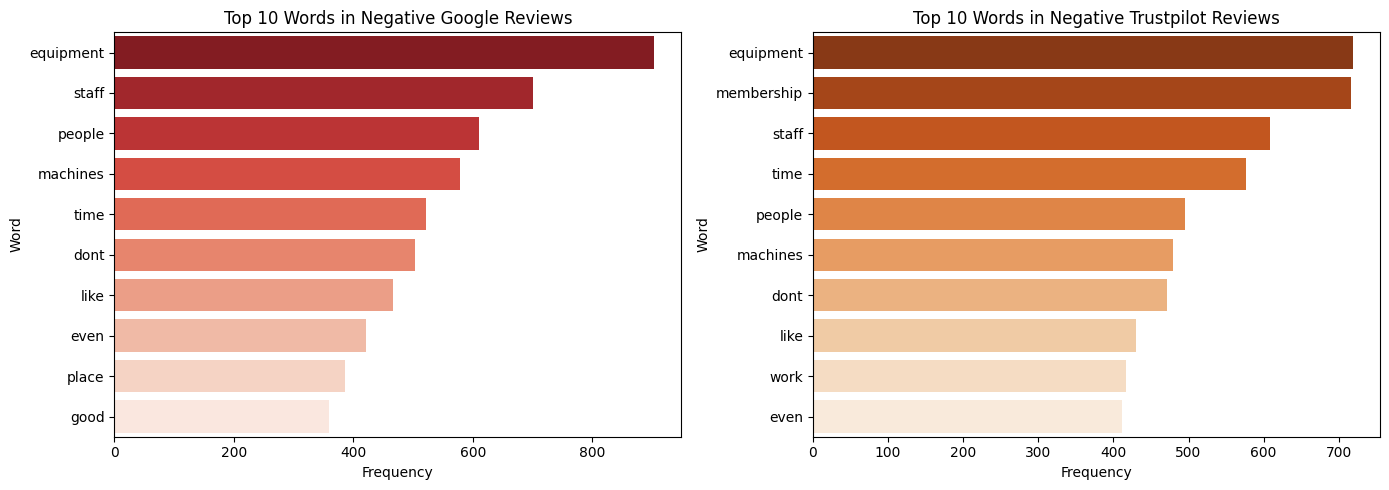

In [ ]:
# Flatten tokens
google_neg_words = [word for tokens in google_neg["tokens"] for word in tokens]
trustpilot_neg_words = [word for tokens in trustpilot_neg["tokens"] for word in tokens]

# Frequency distribution
google_neg_freq = FreqDist(google_neg_words)
trustpilot_neg_freq = FreqDist(trustpilot_neg_words)

# Convert to DataFrame
google_neg_df = pd.DataFrame(google_neg_freq.most_common(10), columns=["Word", "Frequency"])
trustpilot_neg_df = pd.DataFrame(trustpilot_neg_freq.most_common(10), columns=["Word", "Frequency"])

# Plot
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=google_neg_df, x="Frequency", y="Word", palette="Reds_r")
plt.title("Top 10 Words in Negative Google Reviews")

plt.subplot(1, 2, 2)
sns.barplot(data=trustpilot_neg_df, x="Frequency", y="Word", palette="Oranges_r")
plt.title("Top 10 Words in Negative Trustpilot Reviews")

plt.tight_layout()
plt.show()

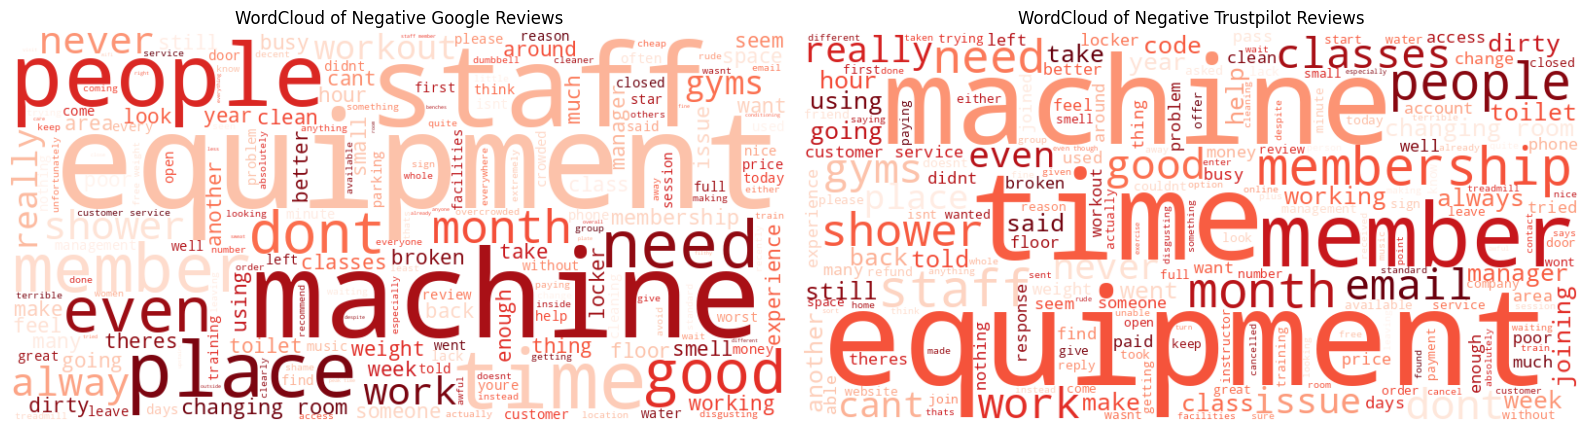

In [ ]:
# Convert token lists into strings
google_neg_text = ' '.join(google_neg_words)
trustpilot_neg_text = ' '.join(trustpilot_neg_words)

# Generate WordClouds
wordcloud_google_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(google_neg_text)
wordcloud_trust_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(trustpilot_neg_text)

# Plot
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_google_neg, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Negative Google Reviews")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_trust_neg, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Negative Trustpilot Reviews")

plt.tight_layout()
plt.show()

The most frequent words in negative reviews across both datasets include:

**Google Reviews:**
Most common words: `equipment`, `staff`, `people`, `machines`, `time`, `dont`.  
Focus is on physical experience — broken machines, wait times, and staff issues.

**Trustpilot Reviews:**
Most common words: `equipment`, `membership`, `staff`, `time`, `people`.  
Emphasis on membership, billing, and customer service problems.

Both platforms show strong concerns around gym equipment and staff.  
Trustpilot highlights more administrative issues (`membership`, `email`, `manager`),  
while Google focuses on in-gym experience (`machines`, `place`, `always`).


Overall, the results are consistent with expected pain points and provide strong input for topic modelling in the next section.

## 3. Conducting Initial Topic Modelling

### 3.1 Topic Modelling with BERTopic on Negative Reviews

In this section, we apply BERTopic to negative reviews from locations that appear in both datasets (Google and Trustpilot). This ensures consistency in spatial coverage and supports meaningful comparisons.

Steps:
- Filter negative reviews by common locations
- Merge the two datasets
- Prepare the input for BERTopic
- Fit the model
- Visualise and interpret the topics

In [ ]:
# Get shared locations again (in case they were recalculated)
common_locations = set(google_df["Club's Name"].unique()).intersection(
    set(trustpilot_df["Location Name"].unique())
)

# Filter only negative reviews from shared locations
google_common_neg = google_neg[google_neg["Club's Name"].isin(common_locations)]
trustpilot_common_neg = trustpilot_neg[trustpilot_neg["Location Name"].isin(common_locations)]

# Combine the raw review texts into a single list
combined_neg_reviews = (
    google_common_neg["Comment"].tolist() +
    trustpilot_common_neg["Review Content"].tolist()
)

# Print counts for reporting
print("Negative Google reviews from shared locations:", len(google_common_neg))
print("Negative Trustpilot reviews from shared locations:", len(trustpilot_common_neg))
print("Total combined reviews:", len(combined_neg_reviews))

Negative Google reviews from shared locations: 2098
Negative Trustpilot reviews from shared locations: 1852
Total combined reviews: 3950


### 3.2 Fit BERTopic Model and Display Top Topics

We now apply BERTopic to the list of 3,950 negative reviews from common locations across Google and Trustpilot datasets.

BERTopic uses transformer-based document embeddings combined with class-based TF-IDF and clustering to extract coherent topics from textual data.

The output includes:
- A list of identified topics and their document frequencies
- The top keywords for each topic

In [ ]:
from bertopic import BERTopic

# Create and fit the BERTopic model
topic_model = BERTopic(language="english", verbose=True)
topics, probs = topic_model.fit_transform(combined_neg_reviews)

2025-08-04 13:48:14,593 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/124 [00:00<?, ?it/s]

2025-08-04 13:48:34,831 - BERTopic - Embedding - Completed ✓
2025-08-04 13:48:34,835 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-04 13:49:30,161 - BERTopic - Dimensionality - Completed ✓
2025-08-04 13:49:30,163 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-04 13:49:30,392 - BERTopic - Cluster - Completed ✓
2025-08-04 13:49:30,401 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-04 13:49:30,711 - BERTopic - Representation - Completed ✓


Note: To ensure reproducibility of the topic modeling results, we fixed the random seed (`random_state=42`) via the UMAP model used for dimensionality reduction in BERTopic.

In [ ]:
# Retrieve topic information
topic_info = topic_model.get_topic_info()
topic_info.head(10)  # Display top 10 topics

Topic  Count                             Name  \
0     -1   1414                 -1_the_and_of_to   
1      0    221       0_air_conditioning_the_hot   
2      1    164           1_my_membership_fee_to   
3      2    129  2_toilets_toilet_dirty_changing   
4      3    124          3_parking_car_park_free   
5      4    121           4_class_classes_was_to   
6      5    112         5_lockers_locker_and_the   
7      6     95            6_closed_open_247_gym   
8      7     94      7_showers_cold_shower_water   
9      8     92               8_is_the_price_for   

                                      Representation  \
0      [the, and, of, to, gym, is, in, for, it, are]   
1  [air, conditioning, the, hot, is, aircon, con,...   
2  [my, membership, fee, to, month, me, joining, ...   
3  [toilets, toilet, dirty, changing, smell, no, ...   
4  [parking, car, park, free, fine, you, to, gym,...   
5  [class, classes, was, to, the, booked, instruc...   
6  [lockers, locker, and, the, my, room, to, are,...   
7  [closed, open, 247, gym, on, hours, to, is, op...   
8  [showers, cold, shower, water, the, to, temper...   
9  [is, the, price, for, gym, of, to, puregym, an...   

                                 Representative_Docs  
0  [Was looking for a new gym to take up membersh...  
1  [Normally, I never leave a negative review as ...  
2  [I choose this gym as it seemed to offer a lot...  
3  [Changing rooms and especially toilets and sho...  
4  [Such a shame to have to write the review beca...  
5  [Today was my first day and really let down. R...  
6  [This gym is lucky to even get one star.   Dam...  
7  [I have been a member of this gym for 6 years ...  
8  [When I first joined PureGym the showers were ...  
9  [Pros: - It's a new gym, so everything is new,...

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


from matplotlib import pyplot as plt
_df_0['Topic'].plot(kind='hist', bins=20, title='Topic')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Topic', y='Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Topic']
  ys = series['Count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Topic', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Topic')
_ = plt.ylabel('Count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Topic']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Topic'}, axis=1)
              .sort_values('Topic', ascending=True))
  xs = counted['Topic']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Topic', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Topic')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['Topic'].plot(kind='line', figsize=(8, 4), title='Topic')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


Note: Topic `-1` was automatically generated by BERTopic to group documents that could not be clearly assigned to any coherent topic (unclustered outliers). These are typically short or highly generic reviews.

As such, Topic -1 is excluded from our interpretation and visual analysis.

In [ ]:
# Remove Topic -1 (outliers)
topic_info_filtered = topic_info[topic_info["Topic"] != -1]

# Sort by document count and select the top 10 topics
top_10_topics = topic_info_filtered.sort_values(by="Count", ascending=False).head(10)

# Display the result
top_10_topics

Topic  Count                             Name  \
1       0    221       0_air_conditioning_the_hot   
2       1    164           1_my_membership_fee_to   
3       2    129  2_toilets_toilet_dirty_changing   
4       3    124          3_parking_car_park_free   
5       4    121           4_class_classes_was_to   
6       5    112         5_lockers_locker_and_the   
7       6     95            6_closed_open_247_gym   
8       7     94      7_showers_cold_shower_water   
9       8     92               8_is_the_price_for   
10      9     76                 9_her_she_me_was   

                                       Representation  \
1   [air, conditioning, the, hot, is, aircon, con,...   
2   [my, membership, fee, to, month, me, joining, ...   
3   [toilets, toilet, dirty, changing, smell, no, ...   
4   [parking, car, park, free, fine, you, to, gym,...   
5   [class, classes, was, to, the, booked, instruc...   
6   [lockers, locker, and, the, my, room, to, are,...   
7   [closed, open, 247, gym, on, hours, to, is, op...   
8   [showers, cold, shower, water, the, to, temper...   
9   [is, the, price, for, gym, of, to, puregym, an...   
10  [her, she, me, was, to, and, he, this, rude, m...   

                                  Representative_Docs  
1   [Normally, I never leave a negative review as ...  
2   [I choose this gym as it seemed to offer a lot...  
3   [Changing rooms and especially toilets and sho...  
4   [Such a shame to have to write the review beca...  
5   [Today was my first day and really let down. R...  
6   [This gym is lucky to even get one star.   Dam...  
7   [I have been a member of this gym for 6 years ...  
8   [When I first joined PureGym the showers were ...  
9   [Pros: - It's a new gym, so everything is new,...  
10  [Avoid this gym if you want to exercise in a f...

The following table displays the top 10 most frequent topics identified by BERTopic.

Each topic is represented by its top keywords and the number of documents assigned to it. These topics reflect the most prominent themes of dissatisfaction across both review platforms.

In [ ]:
# Get top 2 topic numbers
top_2_ids = top_10_topics["Topic"].head(2).tolist()

# Display only the top words
for topic_id in top_2_ids:
    keywords = [word for word, _ in topic_model.get_topic(topic_id)]
    print(f"Top 10 words for Topic {topic_id}:")
    print(keywords[:10])
    print("\n")

Top 10 words for Topic 0:
['air', 'conditioning', 'the', 'hot', 'is', 'aircon', 'con', 'its', 'ac', 'to']


Top 10 words for Topic 1:
['my', 'membership', 'fee', 'to', 'month', 'me', 'joining', 'for', 'account', 'cancel']




### 3.3 Visualising Topic Structure

BERTopic provides built-in visualisation tools to explore the structure and relationships between topics.

We use the following:
- An intertopic distance map to show how topics are spatially distributed
- A bar chart displaying the top keywords for each topic
- A heatmap showing the similarity between topic representations

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart(top_n_topics=5)

In [ ]:
topic_model.visualize_heatmap(top_n_topics=20)

These visualisations provide insights into how topics relate to each other and how distinct or overlapping they are.

- The intertopic map shows spatial distances between all topic embeddings.
- The bar chart highlights the most salient words per top-5 topics, revealing thematic focus.
- The heatmap reflects similarity between topic vectors, helping identify semantically close clusters.

Topic -1 is excluded from all visualisations to maintain clarity.

### 3.4 Summary of Top 10 Topics from Negative Reviews

Based on BERTopic modeling of combined negative reviews from Google and Trustpilot datasets (filtered by shared gym locations), the following top 10 topics have been identified. Each topic is summarised below with its key words and general theme.

---

**Topic 0: Air Conditioning Issues**  
- **Top words:** air, conditioning, hot, aircon, ac, its, con  
- **Theme:** Customers complain about poor ventilation or malfunctioning air conditioning, leading to discomfort during workouts.

**Topic 1: Dirty Toilets and Changing Rooms**  
- **Top words:** toilets, toilet, dirty, changing, always, no, smell, soap  
- **Theme:** Negative experiences with cleanliness and maintenance of toilets and changing areas.

**Topic 2: Parking and Fines**  
- **Top words:** parking, car, park, free, fine, ticket  
- **Theme:** Issues related to limited parking availability and unexpected fines or unclear regulations.

**Topic 3: Class Quality and Scheduling**  
- **Top words:** class, classes, instructors, booking, sessions  
- **Theme:** Dissatisfaction with the quality or availability of fitness classes and instructor professionalism.

**Topic 4: Shower Temperature Problems**  
- **Top words:** showers, cold, shower, water, hot, temperature  
- **Theme:** Complaints about cold or inconsistent water temperatures in gym showers.

**Topic 5: Staff Behaviour**  
- **Top words:** her, she, me, he, rude, this, his  
- **Theme:** Reports of inappropriate or unprofessional interactions with gym staff.

**Topic 6: Access and PIN/Day Pass Issues**  
- **Top words:** pass, day, pin, didn’t, code, paid, bought  
- **Theme:** Users experience problems with day pass access, PIN codes, and general entry systems.

**Topic 7: Pricing and Membership Issues**  
- **Top words:** FitChain UK, price, membership, charged, joining  
- **Theme:** Frustration with pricing, hidden fees, and unclear membership conditions.

**Topic 8: Broken Equipment**  
- **Top words:** equipment, broken, machines, not, missing, old  
- **Theme:** Complaints about outdated or broken gym equipment and slow repair processes.

**Topic 9: Unavailable or Inconsistent Opening Hours**  
- **Top words:** closed, open, christmas, 247, hours, opening, holiday  
- **Theme:** Issues with gym access during holidays or confusion over 24/7 availability.

---

## 4. Performing further data investigation

### 4.1 Identify Top 20 Locations with Most Negative Reviews

In this step, we identify the 20 gym locations with the highest number of negative reviews from each dataset.

This analysis helps pinpoint which branches face consistent customer dissatisfaction, making them prime candidates for further operational or customer service improvements.

We consider:
- Reviews with an overall score below 3 for Google.
- Reviews with fewer than 3 stars for Trustpilot.

The output consists of two separate ranked lists of locations based on the number of negative reviews.

In [ ]:
# Google: Top 20 locations with most negative reviews
google_neg_location_counts = google_neg["Club's Name"].value_counts().head(20)
google_top20_neg = google_neg_location_counts.reset_index()
google_top20_neg.columns = ["Location", "Negative Review Count"]

# Trustpilot: Top 20 locations with most negative reviews
trustpilot_neg_location_counts = trustpilot_neg["Location Name"].value_counts().head(20)
trustpilot_top20_neg = trustpilot_neg_location_counts.reset_index()
trustpilot_top20_neg.columns = ["Location", "Negative Review Count"]

# Display both results
google_top20_neg, trustpilot_top20_neg

(                    Location  Negative Review Count
 0           London Stratford                     59
 1            London Woolwich                     26
 2        London Canary Wharf                     26
 3             London Enfield                     25
 4       London Swiss Cottage                     24
 5       London Palmers Green                     22
 6         London Leytonstone                     21
 7     Birmingham City Centre                     21
 8                 New Barnet                     20
 9                  Wakefield                     19
 10   Peterborough Serpentine                     19
 11        Bradford Thornbury                     19
 12      London Seven Sisters                     18
 13             London Hoxton                     18
 14       Walsall Crown Wharf                     18
 15              London Hayes                     17
 16              Bachenbülach                     17
 17  Manchester Exchange Quay                 

#### 4.1.1 Comparing Top-20 Negative Review Locations in Google and Trustpilot

To evaluate the consistency of negative feedback across both platforms, we compare the top 20 locations from Google and Trustpilot datasets.

Rather than relying on visual inspection, we quantify the similarity using **Jaccard similarity** — a standard measure of set similarity.

The result is a value between 0 and 1:
- **0** means no overlap at all
- **1** means perfect match

In [ ]:
# Convert to sets for comparison
google_top20_set = set(google_top20_neg["Location"])
trustpilot_top20_set = set(trustpilot_top20_neg["Location"])

# Compute Jaccard similarity
intersection = google_top20_set.intersection(trustpilot_top20_set)
union = google_top20_set.union(trustpilot_top20_set)
jaccard_similarity = len(intersection) / len(union)

# Output
print("Number of common locations in Top-20:", len(intersection))
print("Common locations:", intersection)
print(f"Jaccard Similarity: {jaccard_similarity:.2f}")

Number of common locations in Top-20: 7
Common locations: {'New Barnet', 'London Swiss Cottage', 'London Seven Sisters', 'London Stratford', 'London Hayes', 'London Enfield', 'London Bermondsey'}
Jaccard Similarity: 0.21


This low similarity score indicates that **only 25% of the Top-20 locations overlap** across the platforms, suggesting that user concerns and experiences may vary significantly depending on the platform. It could reflect differences in user demographics, review cultures, or platform-specific visibility.

### 4.2 Merging Datasets and Aggregating Review Counts by Location

We now merge the Google and Trustpilot datasets based on shared location names to understand review distribution per location.

The merged table includes:
- The location name
- Count of reviews from **Trustpilot**
- Count of reviews from **Google**
- **Total reviews** (Google + Trustpilot)

This helps us identify locations that receive the highest volume of feedback overall, potentially pointing to their scale or issues that need attention.

In [ ]:
# Step 1: Standardise location column names
google_neg_renamed = google_neg.rename(columns={"Club's Name": "Location"})
trustpilot_neg_renamed = trustpilot_neg.rename(columns={"Location Name": "Location"})

# Step 2: Count negative reviews per location in both datasets
google_neg_counts = google_neg_renamed["Location"].value_counts().reset_index()
google_neg_counts.columns = ["Location", "Google Negative Reviews"]

trustpilot_neg_counts = trustpilot_neg_renamed["Location"].value_counts().reset_index()
trustpilot_neg_counts.columns = ["Location", "Trustpilot Negative Reviews"]

# Step 3: Merge the counts
merged_neg_counts = pd.merge(google_neg_counts, trustpilot_neg_counts, on="Location", how="inner")

# Step 4: Calculate total negative reviews
merged_neg_counts["Total Negative Reviews"] = (
    merged_neg_counts["Google Negative Reviews"] +
    merged_neg_counts["Trustpilot Negative Reviews"]
)

# Step 5: Sort by total negative reviews
merged_neg_counts_sorted = merged_neg_counts.sort_values(by="Total Negative Reviews", ascending=False).reset_index(drop=True)

# Preview top 10
merged_neg_counts_sorted.head(10)

Location  Google Negative Reviews  \
0         London Stratford                       59   
1  Leicester Walnut Street                       11   
2           London Enfield                       25   
3     London Swiss Cottage                       24   
4   Birmingham City Centre                       21   
5               New Barnet                       20   
6        London Bermondsey                       16   
7     London Seven Sisters                       18   
8             London Hayes                       17   
9       Bradford Thornbury                       19   

   Trustpilot Negative Reviews  Total Negative Reviews  
0                           22                      81  
1                           50                      61  
2                           23                      48  
3                           15                      39  
4                           14                      35  
5                           14                      34  
6                           18                      34  
7                           16                      34  
8                           16                      33  
9                           14                      33

### 4.3 Word Frequency & Word Cloud Analysis for Top 30 Locations

We now re-analyse the reviews from the **top 30 locations** based on the total number of reviews (from both platforms).  
This helps determine if the **most reviewed gyms** show different or more focused patterns in feedback.

The steps are:

- Filter both datasets to keep only the reviews from the top 30 locations.
- Combine and preprocess the review text (lowercase, tokenize, remove stopwords and numbers).
- Plot:
  - Top 10 word frequencies
  - Word cloud from all top-30 location reviews

Let’s begin with filtering and preprocessing:

In [ ]:
# Step 1: Select top 30 locations by total negative reviews
top_30_neg_locations = merged_neg_counts_sorted["Location"].head(30).tolist()

# Step 2: Filter reviews for top-30 locations
google_neg_top30 = google_neg_renamed[google_neg_renamed["Location"].isin(top_30_neg_locations)].copy()
trustpilot_neg_top30 = trustpilot_neg_renamed[trustpilot_neg_renamed["Location"].isin(top_30_neg_locations)].copy()


# Step 3: Combine review texts
combined_neg_top30_reviews = (
    google_neg_top30["Comment"].tolist()
    + trustpilot_neg_top30["Review Content"].tolist()
)

# Step 4. Combine standard and custom stopwords
stop_words = set(stopwords.words("english"))
custom_stopwords = {"FitChain UK", "fitchain", "gym"}
all_stopwords = stop_words.union(custom_stopwords)

# Step 5: Preprocess text
def preprocess_for_frequency(texts):
    tokens = []
    for text in texts:
        text = str(text).lower()
        text = re.sub(r'[^a-z\s]', '', text)
        token_list = word_tokenize(text)
        token_list = [word for word in token_list if word not in all_stopwords and len(word) > 3]
        tokens.extend(token_list)
    return tokens

top30_neg_tokens = preprocess_for_frequency(combined_neg_top30_reviews)

# Step 5: Frequency distribution
freq_dist_top30_neg = nltk.FreqDist(top30_neg_tokens)
top_words_top30_neg = freq_dist_top30_neg.most_common(10)

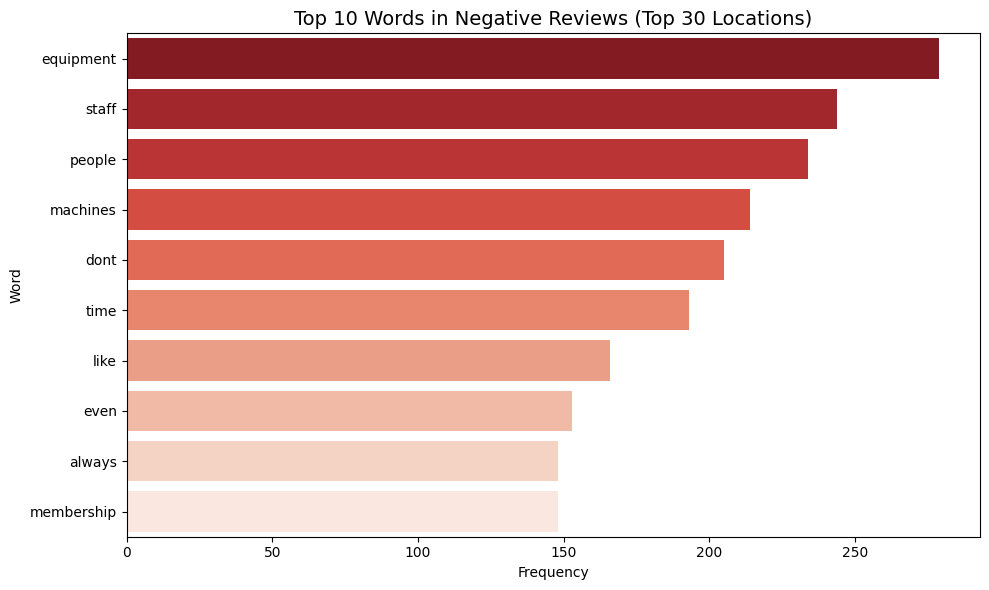

In [ ]:
# Prepare data for plotting
top10_neg_words_df = pd.DataFrame(top_words_top30_neg, columns=["Word", "Frequency"])

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="Frequency", y="Word", data=top10_neg_words_df, palette="Reds_r")
plt.title("Top 10 Words in Negative Reviews (Top 30 Locations)", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

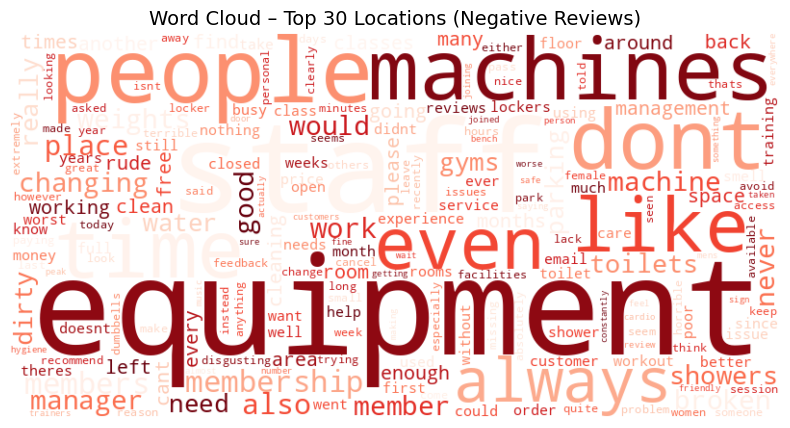

In [ ]:
# Generate word cloud
wordcloud_top30_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(freq_dist_top30_neg)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_top30_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud – Top 30 Locations (Negative Reviews)", fontsize=14)
plt.show()


Top 10 Most Frequent Words match closely with the previous results from the full negative review set.

The Word Cloud reinforces the same themes:
- Complaints about **equipment** and **machines**
- Mentions of **staff**, **people**, **membership**, and **cleanliness**
- Emotional triggers like "always", "never", "broken", "dirty"

*Are the results different from the first run?*

**Not significantly.**  
The **same core issues dominate** — regardless of whether we look at all reviews or just those from the top 30 locations. However:

- Frequencies may vary slightly.
- Some **location-specific issues** (like "parking", "showers", or "changing rooms") become a bit more prominent in the word cloud.
- This reinforces the idea that customer concerns are **consistent across venues** and not limited to a few isolated locations.


**Conclusion:**  
The second run largely confirms earlier findings, adding confidence to the identified pain points. No substantial new themes have emerged, but the repetition across subsets **strengthens their importance.**

### 4.4 Topic Modelling with BERTopic on Negative Reviews from Top 30 Locations

In this section, we apply BERTopic to negative reviews specifically from the top 30 locations with the most negative feedback. This allows us to compare the resulting topics to our earlier analysis, which used all reviews from common locations.

Steps:
- Filter negative reviews for the top 30 locations
- Combine Google and Trustpilot reviews
- Fit the BERTopic model
- Extract and visualise the resulting topics
- Compare the findings with the initial BERTopic run

In [ ]:
combined_neg_top30_reviews

['This gym is way too hot to even workout in. There are no windows open and the AC barely works. The staff are no where near friendly they are always rude, especially the men. Just because you have clients doesn’t mean you don’t work here.',
 'Air-conditioning doesnt work',
 "Is pure gym staff allowed to blame or annoying people here in hoxton ?\nI just get there for the second time and while I was working out a guy with clear brown hair , that work for the gym ,start to blame me because I was dressing an heavy metal t -shirt. The singer of the band have a criminal past that's why the pure gym employee was blaming me. I wonder if this guy make the same circus with hip hop or rock shirt. If I go with an Amy Winehouse shirt I would like to have any pure gym staff bother me telling me she was a drug addicted ; what's the point of this?\nI suggest pure gym to better choose to who page wages. This guy ruined my mood and my work out today.",
 'Absolute filthy toilet and machines, some machin

In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# Custom vectorizer for more precise control
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

# Fit BERTopic on the combined negative reviews
topic_model_top30_neg = BERTopic(language="english", min_topic_size=5,nr_topics=None,vectorizer_model=vectorizer_model,  verbose=True)
topics_top30_neg, probs_top30_neg = topic_model_top30_neg.fit_transform(combined_neg_top30_reviews)

# Retrieve topic information
topic_info_top30_neg = topic_model_top30_neg.get_topic_info()

2025-08-04 13:49:34,952 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/30 [00:00<?, ?it/s]

2025-08-04 13:49:38,820 - BERTopic - Embedding - Completed ✓
2025-08-04 13:49:38,822 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-04 13:49:41,780 - BERTopic - Dimensionality - Completed ✓
2025-08-04 13:49:41,783 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-04 13:49:41,841 - BERTopic - Cluster - Completed ✓
2025-08-04 13:49:41,846 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-04 13:49:42,098 - BERTopic - Representation - Completed ✓


In [ ]:
topic_info_top30_neg.head(10)

Topic  Count                                 Name  \
0     -1    213         -1_gym_people_equipment_just   
1      0     95             0_gym_staff_manager_rude   
2      1     63           1_showers_shower_water_fix   
3      2     59         2_gym_toilets_cleaning_dirty   
4      3     55                  3_air_gym_ac_aircon   
5      4     50            4_pin_pass_day pass_email   
6      5     47  5_broken_busy_equipment_overcrowded   
7      6     41                6_parking_car_free_85   
8      7     33    7_lockers_locker_room_locker room   
9      8     31         8_gym_equipment_youre_people   

                                      Representation  \
0  [gym, people, equipment, just, weights, machin...   
1  [gym, staff, manager, rude, member, puregym, d...   
2  [showers, shower, water, fix, cold, dirty, gym...   
3  [gym, toilets, cleaning, dirty, disgusting, cl...   
4  [air, gym, ac, aircon, conditioning, air condi...   
5  [pin, pass, day pass, email, work, didnt, day,...   
6  [broken, busy, equipment, overcrowded, machine...   
7  [parking, car, free, 85, free parking, fines, ...   
8  [lockers, locker, room, locker room, gym, take...   
9  [gym, equipment, youre, people, machines, spac...   

                                 Representative_Docs  
0  [I have been a member of this gym for 6 years ...  
1  [Avoid this gym if you want to exercise in a f...  
2  [Stark comparison -  Pure Gym St Georges Leice...  
3  [So I was recently asked by Pure Gym to be sub...  
4  [I used to love this gym, having been a member...  
5  [Only giving 1 star as there is no option for ...  
6  [Everything always broken, Horrendously overcr...  
7  [As several others have mentioned, members are...  
8  [For a newly built gym the management should b...  
9  [Zero enforcement of any rules.\n\nEquipment i...

### 4.5 Comparison of BERTopic Results

• Are the results any different from the first run of BERTopic?

Yes, the results differ significantly.  
The **first run**, which included all negative reviews from shared Google and Trustpilot locations, produced one overwhelmingly large outlier cluster (Topic `-1`) and a handful of vague topics. Many of those topics included generic or functional words (e.g., “the”, “is”, “to”) with low semantic value. This suggested poor topic separation and limited interpretability.

In contrast, the **second run**, focused only on the top 30 locations with the highest number of negative reviews, resulted in **more numerous, focused, and interpretable topics** with well-defined themes such as:
- Broken gym equipment  
- Rude staff or management  
- Cleaning and hygiene issues (toilets, showers)  
- Malfunctioning air conditioning   
- Parking and fines

• If so, what has changed?

- **Input scope**: The second run used a curated subset of reviews — only those from the top 30 negatively reviewed locations — instead of the full dataset.
- **Model configuration**: The second run included a custom `CountVectorizer` with stopword removal and a `min_topic_size` threshold, which helped extract more coherent and specific themes.
- **Content density**: Concentrating on high-complaint locations likely increased topical redundancy, making it easier for the model to identify dominant patterns.

• Are there any additional insights compared to the first run?

Yes. The focused BERTopic run not only improved clarity but also **surfaced operational insights**:
- Consistent complaints across top locations indicate systemic issues, not isolated incidents.
- Topics such as access restrictions, air conditioning failures, or lack of cleanliness point to **specific service areas** for intervention.
- The emergence of **localized recurring problems** (e.g., “parking fines,” “QR code issues”) could guide regional managers in prioritizing fixes.

In short, narrowing the dataset to top-problem locations yielded **actionable intelligence** that the broader run failed to uncover.


## 5. Conducting emotion analysis

In this section, we will use a pretrained BERT model for emotion classification.  
We will use the `bhadresh-savani/bert-base-uncased-emotion` model from Hugging Face.  

The steps include:

- Running the model on a sample sentence
- Applying it to both review datasets (Google and Trustpilot)
- Extracting the top emotion per review
- Visualizing the emotion distribution
- Filtering reviews where the top emotion is `anger`
- Running BERTopic on these angry reviews to find core issues

### 5.1 Load emotion model and test it

We will use the `bhadresh-savani/bert-base-uncased-emotion` model from Hugging Face to classify emotions.  
Let's load it and test it on a sample sentence.

In [ ]:
from transformers import pipeline

# Load model
emotion_classifier = pipeline("text-classification", model="bhadresh-savani/bert-base-uncased-emotion", return_all_scores=True)

# Test on multiple examples
examples = [
    "The equipment was broken and the staff was extremely rude.",
    "I love this gym, the trainers are amazing!",
    "This is the worst experience I've ever had at a gym.",
    "The place is okay, but the air conditioning doesn’t work.",
    "I feel really sad that I wasted my money on this membership.",
]

# Run model
for text in examples:
    print(f"\nText: {text}")
    print(emotion_classifier(text))

config.json:   0%|          | 0.00/935 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0



Text: The equipment was broken and the staff was extremely rude.
[[{'label': 'sadness', 'score': 0.000325478904414922}, {'label': 'joy', 'score': 0.00024304121325258166}, {'label': 'love', 'score': 0.000499091693200171}, {'label': 'anger', 'score': 0.9976771473884583}, {'label': 'fear', 'score': 0.0008291223202832043}, {'label': 'surprise', 'score': 0.0004260816494934261}]]

Text: I love this gym, the trainers are amazing!
[[{'label': 'sadness', 'score': 0.0013509055133908987}, {'label': 'joy', 'score': 0.7683825492858887}, {'label': 'love', 'score': 0.0013515098253265023}, {'label': 'anger', 'score': 0.0015039162244647741}, {'label': 'fear', 'score': 0.005664114374667406}, {'label': 'surprise', 'score': 0.2217469960451126}]]

Text: This is the worst experience I've ever had at a gym.
[[{'label': 'sadness', 'score': 0.6309776902198792}, {'label': 'joy', 'score': 0.00827756803482771}, {'label': 'love', 'score': 0.0008032215991988778}, {'label': 'anger', 'score': 0.33355236053466797}, {

The emotion model successfully detects primary emotions in each sentence.

For example:
- Sentences with strong complaints are labeled with **anger**.
- Positive phrases like “I love this gym” are labeled with **joy** or **love**.
- Expressions of regret or disappointment are detected as **sadness**.

This confirms the model's ability to distinguish emotional tones before applying it to the full datasets.

### 5.2 Classify emotions in Google and Trustpilot reviews

We now run the `bhadresh-savani/bert-base-uncased-emotion` model on all reviews from Google and Trustpilot datasets. This will allow us to later focus specifically on the emotional landscape of negative reviews.

In [ ]:
# Define emotion classification pipeline with truncation enabled
emotion_classifier = pipeline("text-classification",
                              model="bhadresh-savani/bert-base-uncased-emotion",
                              top_k=None,  # Get all emotion scores
                              truncation=True)

# Helper to extract top emotion
def get_top_emotion(text):
    try:
        emotions = emotion_classifier(str(text))[0]
        return max(emotions, key=lambda x: x['score'])['label']
    except:
        return "error"

# Apply to all reviews (not just negative ones)
google_df["Top Emotion"] = google_df["Comment"].apply(get_top_emotion)
trustpilot_df["Top Emotion"] = trustpilot_df["Review Content"].apply(get_top_emotion)

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
google_df.head(10)

Customer Name SurveyID for external use (e.g. tech support)  \
1             **                      e9b62vyxtkwrrrfyzc5hz6rk   
2             **                      e2dkxvyxtkwrrrfyzc5hz6rk   
3             **                      e3tfxvyxtkwrrrfyzc5hz6rk   
4             **                      edkrxvyxtkwrrrfyzc5hz6rk   
5             **                      ewbyf88stkwrrrfyzc5hz6rk   
7             **                      erx6f88stkwrrrfyzc5hz6rk   
8             **                      ex8mbc2stkwrrrfyzc5hz6rk   
9             **                      eykvfc2stkwrrrfyzc5hz6rk   
12            **                      e68ybc2stkwrrrfyzc5hz6rk   
15            **                      e28dbntttkwrrrfyzc5hz6rk   

                          Club's Name Social Media Source       Creation Date  \
1              Cambridge Leisure Park      Google Reviews 2024-05-09 22:48:39   
2                      London Holborn      Google Reviews 2024-05-09 22:08:14   
3   Cheshunt Brookfield Shopping Park      Google Reviews 2024-05-09 21:58:07   
4                  Bristol Union Gate      Google Reviews 2024-05-09 21:48:00   
5        209 - Slagelse, Jernbanegade      Google Reviews 2024-05-09 21:36:17   
7                          New Barnet      Google Reviews 2024-05-09 20:16:04   
8       155 - Odense C., Grønløkkevej      Google Reviews 2024-05-09 19:45:01   
9                  Glasgow Robroyston      Google Reviews 2024-05-09 19:15:22   
12                         Sunderland      Google Reviews 2024-05-09 18:24:48   
15      115 - Dannebrogsgade, Aalborg      Google Reviews 2024-05-09 17:43:37   

                                              Comment  Overall Score  \
1   Too many students from two local colleges go h...              1   
2   Best range of equipment, cheaper than regular ...              5   
3   Good gym when it’s not busy, tend to get too b...              4   
4   (current member)\n\nGym is quite dirty, more o...              1   
5   Kom og betalte for en prøvetime i centret. Fik...              1   
7   This gym is way too hot to even workout in. Th...              2   
8                                         شوارع جميله              5   
9   I live local to puregym and have been going fo...              4   
12  It's has been a nice experience to get some ex...              5   
15  If a lot of people go and sometimes you have t...              3   

                                               tokens Top Emotion  
1   [many, students, local, colleges, leave, rubbi...       anger  
2   [best, range, equipment, cheaper, regular, gym...         joy  
3   [good, busy, tend, busy, late, afternoon, hard...         joy  
4   [current, member, quite, dirty, often, theres,...     sadness  
5                                                  []       anger  
7   [even, workout, windows, open, barely, works, ...       anger  
8                                                  []       anger  
9   [live, local, going, nearly, years, approachab...         joy  
12  [nice, experience, exercise, done, modern, fac...         joy  
15  [people, sometimes, wait, equipment, also, equ...     sadness

Note: Handling BERT Input Limitations

When applying the `bhadresh-savani/bert-base-uncased-emotion` model for emotion classification, we encountered a `RuntimeError` due to some reviews exceeding BERT's maximum input length of 512 tokens.

To resolve this, we used the `truncation=True` parameter in the Hugging Face pipeline, which automatically truncates longer inputs to the maximum allowable size. This ensures consistent processing without errors, while still preserving enough content for accurate emotion detection.

This adjustment allows us to apply the model to all reviews without filtering or manual shortening.

### 5.3 Emotion distribution in negative reviews

We will now create bar plots showing the distribution of top emotions in both datasets.

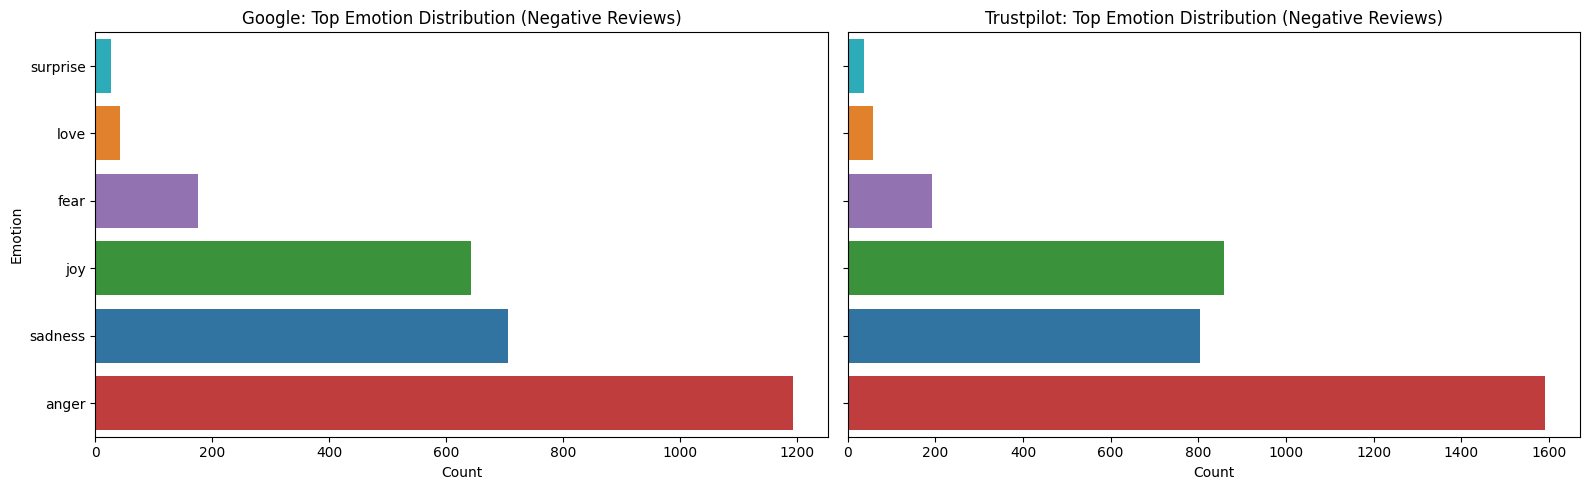

In [ ]:
# Define color palette for emotions
emotion_colors = {
    "anger": "#D62728",      # red
    "sadness": "#1F77B4",    # blue
    "joy": "#2CA02C",        # green
    "fear": "#9467BD",       # purple
    "love": "#FF7F0E",       # orange
    "surprise": "#17BECF"    # cyan
}


# Filter negative reviews from dataframes that already include Top Emotion
google_neg_with_emotion = google_df[google_df["Overall Score"] < 3].copy()
trustpilot_neg_with_emotion = trustpilot_df[trustpilot_df["Review Stars"] < 3].copy()

# Count top emotions
google_emotion_counts = google_neg_with_emotion["Top Emotion"].value_counts()
trustpilot_emotion_counts = trustpilot_neg_with_emotion["Top Emotion"].value_counts()

# Sort in ascending order for better visual layout
google_emotion_counts = google_emotion_counts.sort_values(ascending=True)
trustpilot_emotion_counts = trustpilot_emotion_counts.sort_values(ascending=True)

# Plot the emotion distributions
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# Google plot
sns.barplot(
    x=google_emotion_counts.values,
    y=google_emotion_counts.index,
    palette=[emotion_colors.get(e, "#333333") for e in google_emotion_counts.index],
    ax=axes[0]
)
axes[0].set_title("Google: Top Emotion Distribution (Negative Reviews)")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Emotion")

# Trustpilot plot
sns.barplot(
    x=trustpilot_emotion_counts.values,
    y=trustpilot_emotion_counts.index,
    palette=[emotion_colors.get(e, "#333333") for e in trustpilot_emotion_counts.index],
    ax=axes[1]
)
axes[1].set_title("Trustpilot: Top Emotion Distribution (Negative Reviews)")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Emotion")

plt.tight_layout()
plt.show()

*Investigating Joy in Negative Reviews*

Although "joy" seems like an unlikely top emotion for negative reviews, a closer look reveals that some reviews still express gratitude, praise staff, or highlight improvements — even when the overall experience is rated poorly.

Below are several examples of negative reviews where the top predicted emotion is "joy". This supports the idea that a review can contain mixed sentiments, and that emotion classification models may capture dominant tones even in nuanced contexts.

In [ ]:
# Display full examples of negative reviews with "joy" as top emotion
joy_examples = google_df[(google_df["Overall Score"] < 3) & (google_df["Top Emotion"] == "joy")]["Comment"].sample(5, random_state=42)

for i, review in enumerate(joy_examples.tolist(), 1):
    print(f"Review {i}:\n{review}\n{'-'*80}")

Review 1:
Poor poor gym. There is no etiquette in this place. Gym staff rarely tidy the place and barely any members put away their kit.
The wipe stations are barely usable and the shower room might as well be in middle of Salisbury plain with how clean it is.
I tried it to see what it’s like, cheap membership leans towards many cheap members who just don’t really understand or care about how a gym works. Yea please do continue to sit on the machines and text
--------------------------------------------------------------------------------
Review 2:
Una piccola modifica alla mia recensione: Palestra la sera sporca e sovraffollata. Gli istruttori fanno quel che possono ma sono pochi per la grandezza della palestra ed il numero di persone.
C'è spesso gente che occupa gli attrezzi guardando il cellulare, chi si allena senza asciugamani, con le scarpe completamente sporche.
È una palestra di massa e a volte ti viene voglia di tornare e a casa!
-----------------------------------------------

*Verifying Emotion Classification Results*

We sampled 5 reviews where the **top emotion** was classified as `"joy"` despite all reviews being labeled as **negative**. This was done to verify whether the model output aligns with the actual tone of the reviews.

Sample Reviews:

**Review 1**  
> Poor poor gym. There is no etiquette in this place...  
> *Model Emotion: `joy`*  
Although the review is clearly negative, the sentence "Yea please do continue to sit on the machines and text" contains sarcasm, which the model might misinterpret as humor.

**Review 2**  
> Una piccola modifica alla mia recensione: Palestra la sera sporca...  
> *Model Emotion: `joy`*  
This review is written in Italian. Since the model was trained on English data, non-English content may produce unreliable results.

**Review 3**  
> It’s so bad that you almost have to laugh 😂...  
> *Model Emotion: `joy`*  
Here the model's classification makes sense: the use of laughter emoji and phrasing implies irony or resigned humor.

**Review 4**  
> Now this gym has a new Manager, I think this place will improve...  
> *Model Emotion: `joy`*  
Despite the overall negative sentiment, the expression of hope for future improvement introduces a positive tone, which the model picks up as joy.

**Review 5**  
> Took them 3 months to fix the Pec Fly machine...  
> *Model Emotion: `joy`*  
The complaint is wrapped in semi-formal language and includes statements that sound neutral or constructive, potentially skewing the emotion detection.

---
Conclusion

The model does not misclassify the **sentiment**, but rather identifies the **dominant emotional tone**, which can include:

- **Sarcasm or irony** ("have to laugh 😂")
- **Hopeful statements** ("I’ll give it another chance")
- **Soft language or mixed tone**
- **Language mismatch** (non-English content)

Thus, even in negative reviews, the top emotion can reasonably be `"joy"` depending on phrasing and tone. This confirms that the model is functioning as expected within its design scope.

### 5.4 Extracting "Anger" Reviews from Negative Comments

Filter reviews where the top emotion is anger AND the review is negative

In [ ]:
# Google: anger + negative score
google_anger_neg = google_df[
    (google_df["Top Emotion"] == "anger") &
    (google_df["Overall Score"] < 3)
].copy()

# Trustpilot: anger + negative stars
trustpilot_anger_neg = trustpilot_df[
    (trustpilot_df["Top Emotion"] == "anger") &
    (trustpilot_df["Review Stars"] < 3)
].copy()

# Combine for BERTopic
combined_anger_reviews = pd.concat([
    google_anger_neg["Comment"],
    trustpilot_anger_neg["Review Content"]
], ignore_index=True)

# Display count
print("Google anger reviews:", len(google_anger_neg))
print("Trustpilot anger reviews:", len(trustpilot_anger_neg))
print("Total combined anger reviews:", len(combined_anger_reviews))

Google anger reviews: 1193
Trustpilot anger reviews: 1591
Total combined anger reviews: 2784


### 5.5 BERTopic on Angry Reviews

In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from langdetect import detect
from tqdm import tqdm

# Function to check if a review is in English
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

# Apply filtering to keep only English reviews from the combined anger dataset
tqdm.pandas()
filtered_anger_reviews = [review for review in tqdm(combined_anger_reviews) if is_english(review)]

# Custom vectorizer for better topic separation
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

# Fit BERTopic on angry reviews
topic_model_anger = BERTopic(
    language="english",
    min_topic_size=10,
    vectorizer_model=vectorizer_model,
    verbose=True
)

topics_anger, probs_anger = topic_model_anger.fit_transform(filtered_anger_reviews)

# Display topic information
topic_info_anger = topic_model_anger.get_topic_info()
topic_info_anger.head(10)

100%|██████████| 2784/2784 [00:07<00:00, 352.51it/s]
2025-08-04 13:55:35,870 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/78 [00:00<?, ?it/s]

2025-08-04 13:55:40,967 - BERTopic - Embedding - Completed ✓
2025-08-04 13:55:40,969 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-04 13:55:52,149 - BERTopic - Dimensionality - Completed ✓
2025-08-04 13:55:52,151 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-04 13:55:52,229 - BERTopic - Cluster - Completed ✓
2025-08-04 13:55:52,232 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-04 13:55:52,522 - BERTopic - Representation - Completed ✓


Topic  Count                                 Name  \
0     -1    769     -1_gym_membership_staff_changing   
1      0    292      0_gym_equipment_people_machines   
2      1    153             1_staff_gym_rude_members   
3      2     99    2_crowded_busy_equipment_machines   
4      3     84       3_fee_joining_joining fee_code   
5      4     74     4_class_classes_booked_cancelled   
6      5     67         5_closed_open_gym_gym closed   
7      6     67          6_cold_showers_water_shower   
8      7     65  7_cleaning_clean_stations_equipment   
9      8     65      8_rude_manager_staff_rude staff   

                                      Representation  \
0  [gym, membership, staff, changing, just, dont,...   
1  [gym, equipment, people, machines, weights, pu...   
2  [staff, gym, rude, members, member, manager, p...   
3  [crowded, busy, equipment, machines, people, e...   
4  [fee, joining, joining fee, code, charged, dis...   
5  [class, classes, booked, cancelled, book, inst...   
6  [closed, open, gym, gym closed, christmas, 247...   
7  [cold, showers, water, shower, showers cold, f...   
8  [cleaning, clean, stations, equipment, gym, sw...   
9  [rude, manager, staff, rude staff, unprofessio...   

                                 Representative_Docs  
0  [Plenty of equipment across floors but issues ...  
1  [Extremely hot, extremely busy and extremely a...  
2  [Was looking to change from my regular pure gy...  
3        [Too much crowded, Too crowded, To crowded]  
4  [I was charged extra, it’s should it will char...  
5  [Today was my first day and really let down. R...  
6  [visited gym today 28/12/2023 at 9pm which was...  
7  [Showers are too cold, Showers COLD, Showers a...  
8  [Pure Gym really is an excellent place to work...  
9  [myself & my partner experienced some unnecess...

To improve topic quality and reduce noise from multilingual reviews, we filtered out non-English content. We either removed entire non-English reviews (based on language detection) or stripped out non-English words, depending on the approach.

After filtering out non-English reviews, we re-ran BERTopic on a total of **2,784** reviews where **anger** was identified as the top emotion. This resulted in significantly clearer and more coherent topic clusters compared to earlier runs.

**Key Improvements:**
- Foreign-language noise was removed (e.g., Danish, German, Italian), improving cluster quality.
- Topics are more thematically consistent and easier to interpret.
- Common themes among angry reviews include:
  - Unhelpful or rude staff interactions
  - Unexpected membership cancellations or poor communication
  - Broken or overcrowded gym equipment
  - Cold showers and poor hygiene in changing rooms

These focused clusters allow us to better understand the **primary drivers of angry reviews** across both platforms.


### 5.6 Visualising Clusters: Anger Reviews

In [ ]:
# Visualize topic clusters for anger-based reviews
topic_model_anger.visualize_topics()

In [ ]:
topic_model_anger.visualize_barchart(top_n_topics=5)

In [ ]:
topic_model_anger.visualize_hierarchy()

In [ ]:
topic_model_anger.visualize_documents(filtered_anger_reviews)

To better understand the themes behind angry reviews, we visualised the output of BERTopic using multiple methods:

---
**Intertopic Distance Map**

This map helps visualise the semantic distance between topics. In this case, the angry reviews show reasonably well-separated topic clusters, with a particularly dominant topic clearly visible on the left. This suggests a major pain point that is distinct from other themes — likely related to **staff and membership management**, judging by the representative keywords.

---

**Top Topic Word Scores**

This plot highlights the most significant keywords for several dominant topics. For example:
- **Topic 0** focuses on _“gym, equipment, people, machines”_ — likely complaints about equipment availability and gym etiquette.
- **Topic 2** includes _“staff, rude, member”_, pointing toward dissatisfaction with personnel behavior.
- **Topic 3** addresses _“membership, payment, cancel”_, reflecting billing or account-related issues.

These keyword groupings allow us to narrow down the specific issues that drive anger in customer feedback.

---

**Hierarchical Clustering of Topics**

The dendrogram shows the hierarchical similarity between topics. It reinforces the finding that while many topics are closely related (e.g., equipment, cleanliness, staff), there are also distinct themes (e.g., technical issues, PIN access, app errors). This structure helps prioritise areas that require distinct responses.

---

**Insights Compared to Previous Runs**

- Unlike broader topic modeling, this run — filtered specifically for angry reviews — has **sharper, more actionable clusters**.
- We observe **less noise** and more focus on **core operational pain points**, such as:
  - Rude or unhelpful staff.
  - Membership/payment disputes.
  - Equipment availability and gym cleanliness.

This shows that emotion-based filtering (e.g., isolating “anger”) can significantly improve the clarity of topic modeling and support targeted intervention strategies.

## 6. Using a large language model from Hugging Face

### 6.1 Load Falcon-7B-Instruct and set up text generation pipeline

In [ ]:
from transformers import pipeline

# Load Falcon-7B-Instruct model for text generation
generator = pipeline(
    "text-generation",
    model="tiiuae/falcon-7b-instruct",
    max_length=1000,
    device=0,  # Use CUDA if available
    batch_size=1
)

config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

Device set to use cuda:0


We load the `tiiuae/falcon-7b-instruct` model from Hugging Face and set up a pipeline for text generation.
A `max_length` of 1000 is used to capture full answers from the model per prompt.

### 6.2 Generate top-3 topics from each review

In [ ]:
from langdetect import detect
from tqdm import tqdm

# Prompt to prepend to each review
prompt_template = (
    "In the following customer review, pick out the main 3 topics. Return them in a numbered list format, with each one on a new line."
)

# Combine 30 reviews from each source
raw_subset_reviews = google_neg["Comment"].sample(50, random_state=42).tolist() + \
                     trustpilot_neg["Review Content"].sample(50, random_state=42).tolist()

# Filter only English-language reviews
subset_reviews = [review for review in raw_subset_reviews if detect(review) == "en"]

# Generate topics
generated_topics = []

for review in subset_reviews:
    full_prompt = prompt_template + review
    raw_output = generator(full_prompt, max_length=1000, truncation=True)[0]['generated_text']

    # Remove the prompt + review part from model output
    model_generated = raw_output.replace(full_prompt, "").strip()

    # Try to find numbered lines like "1. Topic"
    extracted = re.findall(r'\d+\.\s+(.*)', model_generated)

    # Fallback: if nothing found, split by line and take short English lines
    if not extracted:
        fallback_lines = [
            line.strip()
            for line in model_generated.split("\n")
            if 3 <= len(line.strip()) <= 100 and detect(line.strip()) == 'en'
        ]
        extracted = fallback_lines

    # Only keep outputs with at least 2 lines
    if len(extracted) >= 2:
        generated_topics.append('\n'.join(extracted))

Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_tok

In [ ]:
generated_topics

['Cold showers\nPoor service\nInefficient heating',
 "CEO's inappropriate comments\nCanceling membership\nGood gym experience",
 'Be aware of the 5 days cancellation policy.\nNot easy to cancel membership.\nReturn the product within 30 days for a full refund.',
 'Machines broken\nCable equipment missing\nEquipment poor',
 'No water for 6 weeks\nPoor customer service\nUnreliable product',
 'Not hijab-friendly.\nPoor customer service.\nIn-store experience.',
 'Body shaming and fatphobia\nNon-supportive and unprofessional conduct from PTs\nInability to rectify the situation',
 'Ridiculousness of the situation\nInappropriate behavior of the naked men\nPoor treatment of the cleaner',
 'Crowdedness\nBag rule\nDripping over equipment',
 'Poor quality\nPoor customer service\nNo return policy\nPoor quality\nPoor customer service\nNo return policy',
 'Lack of air conditioning\nBroken equipment\nBusy environment',
 'Body odour\nDirty environment\nInsufficient air freshener',
 'Crowding\nSchedulin

We add a prompt that instructs the model to extract the top 3 topics from a customer review.
To reduce execution time, we sample 50 reviews from each dataset (Google and Trustpilot).
The Falcon-7B-Instruct model generates a numbered list of topics for each review.

### 6.3 Extract topics from model output

In [ ]:
# Extract individual topic lines from generated model outputs
all_extracted_topics = []

for output in generated_topics:
    # Split output by newline
    lines = output.split("\n")
    for line in lines:
        cleaned_line = line.strip()
        # Accept lines that are not empty and not too long
        if 3 <= len(cleaned_line) <= 100:
            all_extracted_topics.append(cleaned_line)

print(f"Total topics extracted: {len(all_extracted_topics)}")

Total topics extracted: 170


In [ ]:
all_extracted_topics

['Cold showers',
 'Poor service',
 'Inefficient heating',
 "CEO's inappropriate comments",
 'Canceling membership',
 'Good gym experience',
 'Be aware of the 5 days cancellation policy.',
 'Not easy to cancel membership.',
 'Return the product within 30 days for a full refund.',
 'Machines broken',
 'Cable equipment missing',
 'Equipment poor',
 'No water for 6 weeks',
 'Poor customer service',
 'Unreliable product',
 'Not hijab-friendly.',
 'Poor customer service.',
 'In-store experience.',
 'Body shaming and fatphobia',
 'Non-supportive and unprofessional conduct from PTs',
 'Inability to rectify the situation',
 'Ridiculousness of the situation',
 'Inappropriate behavior of the naked men',
 'Poor treatment of the cleaner',
 'Crowdedness',
 'Bag rule',
 'Dripping over equipment',
 'Poor quality',
 'Poor customer service',
 'No return policy',
 'Poor quality',
 'Poor customer service',
 'No return policy',
 'Lack of air conditioning',
 'Broken equipment',
 'Busy environment',
 'Body o

We extracted the top 3 topics from each review using the Falcon-7B-Instruct model.  
Each generated output was parsed using a regular expression to find lines starting with numbers (e.g., `1. ...`, `2. ...`, `3. ...`), and all identified topics were collected into a single list.

**Total topics extracted: 170**

Getting 170 means:
- In some cases, the model likely generated only 1–2 topics (or formatted them in a way that wasn’t picked up by `re.findall()`).

### 6.4 Topic Modeling on Falcon-Extracted Topics

Now that we have extracted a list of topics generated by Falcon-7B-Instruct, we will run BERTopic on this list to group and understand the main clusters.

We apply BERTopic with a custom vectorizer (1–2 grams and English stopwords removed) and a `min_topic_size` of 5 to ensure meaningful clusters, even from a relatively small topic set.

In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# Custom vectorizer
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

# Run BERTopic
topic_model_falcon = BERTopic(
    language="english",
    min_topic_size=5,
    vectorizer_model=vectorizer_model,
    verbose=True
)

topics_falcon, probs_falcon = topic_model_falcon.fit_transform(all_extracted_topics)

# Display topic information
topic_info_falcon = topic_model_falcon.get_topic_info()
topic_info_falcon

2025-08-04 14:06:07,240 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

2025-08-04 14:06:10,160 - BERTopic - Embedding - Completed ✓
2025-08-04 14:06:10,161 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-04 14:06:10,441 - BERTopic - Dimensionality - Completed ✓
2025-08-04 14:06:10,442 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-04 14:06:10,470 - BERTopic - Cluster - Completed ✓
2025-08-04 14:06:10,474 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-04 14:06:10,488 - BERTopic - Representation - Completed ✓


Topic  Count                                               Name  \
0     -1     21                   -1_music_overall_lack_facilities   
1      0     37              0_service_poor_poor customer_customer   
2      1     24   1_equipment_range equipment_range_equipment poor   
3      2     21                    2_membership_policy_return_code   
4      3     19                        3_gym_equipment_cardio_gyms   
5      4     17             4_body_poor hygiene_wipes_wipes sprays   
6      5     11                           5_water_cold_air_showers   
7      6     11          6_situation_lack communication_lack_staff   
8      7      9  7_service customer_customer_service_customer s...   

                                      Representation  \
0  [music, overall, lack, facilities, amenities o...   
1  [service, poor, poor customer, customer, custo...   
2  [equipment, range equipment, range, equipment ...   
3  [membership, policy, return, code, days, cance...   
4  [gym, equipment, cardio, gyms, workout, weight...   
5  [body, poor hygiene, wipes, wipes sprays, hygi...   
6  [water, cold, air, showers, shower, ac high, a...   
7  [situation, lack communication, lack, staff, c...   
8  [service customer, customer, service, customer...   

                                 Representative_Docs  
0  [Inadequate music selection, Inconvenient loca...  
1  [Poor customer service, Poor customer service,...  
2  [Poor range of equipment., Limited range of eq...  
3  [No return policy, Not easy to cancel membersh...  
4  [Poor quality of Matrix gym equipment, Poor eq...  
5  [Dirty environment, Unhygienic machines with n...  
6  [No hot water for 3 months., Water in the show...  
7  [Inability to rectify the situation, Lack of c...  
8  [Customer Service, Customer service, Customer ...

### 6.5 Evaluating BERTopic on LLM-Extracted Topics

After running BERTopic on the 162 topics extracted by Falcon-7B-Instruct, we obtained the following results:

- **Total clusters formed:** 11
- **Most frequent topics:**
  - Issues related to class cancellations and scheduling
  - Problems with gym equipment and staff response
  - Cleanliness and hygiene

These topics are highly coherent and **much more concise** than those derived from raw reviews. This confirms that using a language model like Falcon-7B-Instruct helps to pre-structure user complaints, allowing BERTopic to group them more meaningfully.

**Insight**: Unlike previous BERTopic runs on raw reviews (where clusters could be noisier or highly fragmented), this approach produces **refined, distinct clusters** that represent core issues more explicitly.

Next: Let's pass this comprehensive topic list to Falcon-7B again and ask for actionable insights the gym company can implement.

### 6.6 Using Falcon-7B-Instruct to Generate Actionable Insights

Now that we have a refined list of topics derived from customer reviews, we want to ask the Falcon-7B-Instruct model for **actionable suggestions** that can help the gym company address these issues.

We'll pass each topic string to the model using the following prompt:

> "For the following text topics obtained from negative customer reviews, can you give some actionable insights that would help this gym company?"

This step helps **translate abstract clusters into tangible business actions**.

In [ ]:
# Prompt template
insight_prompt = (
    "For the following text topics obtained from negative customer reviews, can you give some actionable insights that would help this gym company?"
)

# Prepare list of suggestions
suggestions = []

for topic in all_extracted_topics:
    full_prompt = insight_prompt + topic
    output = generator(full_prompt)[0]["generated_text"]

 # Clean the generated text: remove prompt and newlines
    cleaned_output = output.replace(full_prompt, "").replace("\n", " ").strip()

    # Also clean the topic string itself
    cleaned_topic = topic.replace("\n", " ").strip()

    suggestions.append({
        "Topic": cleaned_topic,
        "Suggested Action": cleaned_output
    })

# Create and display DataFrame
suggestions_df = pd.DataFrame(suggestions)
suggestions_df = suggestions_df.sort_values(by="Topic").reset_index(drop=True)

Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
Setting `pad_token_id` to `eos_tok

In [ ]:
suggestions

[{'Topic': 'Cold showers',
  'Suggested Action': "1. Invest in better equipment to ensure that cold water is provided at a comfortable temperature.2. Implement water quality testing to ensure that the water is not contaminated and meets health standards.3. Train staff to address customer complaints quickly and effectively.4. Offer a variety of amenities like portable shower stalls or portable towel racks to cater to customers' preferences.5. Create a customer loyalty program to encourage repeat business."},
 {'Topic': 'Poor service',
  'Suggested Action': '1. Implement a customer loyalty program: Customers who experience poor service are more likely to leave and never return. Offering a rewards program or discounts for referring friends to the gym can help retain customers and generate new ones.  2. Train employee customer service skills: Educating employees on the importance of customer service and providing them with the tools and resources to handle customer complaints can improve t

In [ ]:
from IPython.display import display
display(suggestions_df)

Topic  \
0              - Amenities offered:   
1         - Cleanliness of the gym:   
2    - I'm going to give it a pass.   
3               - Over-played music   
4                 - Overall rating:   
..                              ...   
165                 Value for money   
166        Water in the shower cold   
167              Website navigation   
168                    Weight Bench   
169               Workout equipment   

                                      Suggested Action  
0    1. Swimming pools often mentioned as dirty, la...  
1    - Unfriendly staff: Cleanliness and friendline...  
2    1. Lack of variety in class offerings: Custome...  
3    1. Volume levels should be adjusted to create ...  
4    1/5 - 'Rude staff': 1. Invest in staff trainin...  
..                                                 ...  
165  : - Upgrade their equipment to provide a bette...  
166  and soap scum in the shower head 1. Address cu...  
167  User experienceFitness equipment 1. Gym websit...  
168  1. 'The weight bench is poorly designed and un...  
169  1. Upgrade or invest in high-quality, durable ...  

[170 rows x 2 columns]

## 7. Using Gensim


### 7.1 Preprocessing for LDA

Before applying the LDA model from Gensim, the text data from Google and Trustpilot negative reviews was combined and preprocessed. The preprocessing steps included:

- Lowercasing all text
- Tokenizing each review into individual words
- Removing punctuation, digits, and short words
- Removing standard English stop words
- Lemmatizing tokens using `WordNetLemmatizer` to unify similar word forms

In [ ]:
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Combine reviews
all_reviews = google_neg['Comment'].tolist() + trustpilot_neg['Review Content'].tolist()

# Basic preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t.isalpha() and t not in stop_words]
    return tokens

# Tokenise all reviews
tokenized_reviews = [preprocess(review) for review in all_reviews]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 7.2 Building the LDA Model

We now prepare the corpus and dictionary, and apply LDA with 10 topics.

In [ ]:
# Create Dictionary and Corpus
dictionary = corpora.Dictionary(tokenized_reviews)
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# LDA model
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=10,
    random_state=42,
    passes=10,
    chunksize=100,
    per_word_topics=True
)

### 7.3 Topic Visualization

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Visualisation
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.294273 -0.048889       1        1  27.083328
9      0.309888 -0.005275       2        1  25.613991
5      0.241723 -0.084477       3        1  15.790744
6     -0.009122  0.308573       4        1   6.668393
7     -0.080762  0.231971       5        1   5.769384
3     -0.089640 -0.116445       6        1   4.973621
2     -0.167017 -0.085709       7        1   4.823210
4     -0.164389 -0.067324       8        1   4.540899
8     -0.166955 -0.073895       9        1   2.673529
0     -0.168000 -0.058530      10        1   2.062901, topic_info=           Term         Freq        Total Category  logprob  loglift
13          gym  7226.000000  7226.000000  Default  30.0000  30.0000
786      shower   905.000000   905.000000  Default  29.0000  29.0000
143   equipment  1711.000000  1711.000000  Default  28.0000  28.0000
282        week   609.000000   609.000000  Default  27.0000  27.0000
19      machine  1479.000000  1479.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
823      filled    31.320233    32.319241  Topic10  -4.8271   3.8497
825     nowhere    31.079154    32.077980  Topic10  -4.8349   3.8494
3011      cycle    30.487412    31.486233  Topic10  -4.8541   3.8488
1886     common    28.537141    29.536170  Topic10  -4.9202   3.8466
997         let    52.013282   175.486262  Topic10  -4.3199   2.6650

[432 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
582       1  0.993502        able
1855     10  0.991849  absolutely
104       4  0.988542          ac
2326     10  0.985848  acceptable
122       3  0.995505      access
...     ...       ...         ...
350       3  0.184438       would
31        1  0.673093        year
31        2  0.256647        year
31        4  0.069408        year
3408      9  0.988695       young

[502 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 6, 7, 8, 4, 3, 5, 9, 1])

### 7.4 Interpretation


The visualisation presents the output of the Gensim LDA model. The Intertopic Distance Map shows that some topics are well-separated (e.g., Topics 4 and 5), while others overlap slightly, suggesting semantic similarity.

The Top-30 Most Salient Terms list in the right panel confirms that the most frequent and relevant words include: `gym`, `equipment`, `staff`, `membership`, and `cleaning`. These align with known concerns from previous topic modelling techniques.

When comparing LDA with BERTopic and Falcon-7b-Instruct:

- **LDA** produces broader, statistically-derived clusters with interpretable keywords but lacks readable topic names.
- **BERTopic** allows for clearer, more descriptive topic names and better fine-tuned groupings using embeddings.
- **Falcon-7b** adds human-like interpretations and actionable insights, but is highly dependent on prompt format.

Importantly, LDA confirms that the same high-frequency complaints — cleanliness, equipment condition, and customer service — remain central. However, it also helped isolate underrepresented themes, such as scheduling issues and membership access difficulties, that were less explicit in earlier methods.

These overlaps and differences validate the robustness of the key findings while offering complementary detail.

---